# ch5. 트리

#ch5-1. 결정트리

In [2]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()
wine.info()
wine.describe()


data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine[['class']].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,target, test_size=0.2, random_state=42)  # test_size=0.2 --> 20%만 테스트 데이터로(default = 25%)

print(train_input.shape, test_input.shape)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print({'Train Score': lr.score(train_scaled,train_target)})
print({'Test Score': lr.score(test_scaled,test_target)})



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
(5197, 3) (1300, 3)
{'Train Score': 0.7808350971714451}
{'Test Score': 0.7776923076923077}


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Train Score': 0.996921300750433}
{'Test Score': 0.8569230769230769}


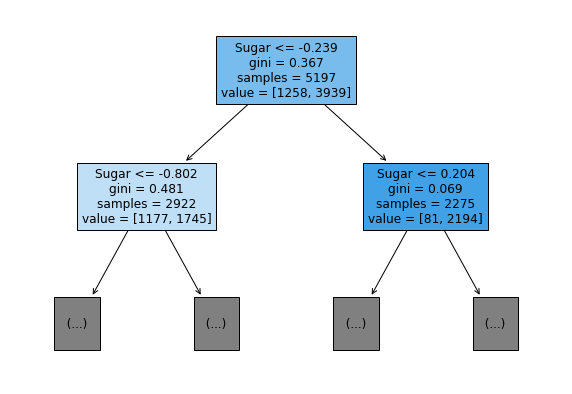

In [3]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(train_scaled, train_target)
print({'Train Score': dt.score(train_scaled,train_target)})
print({'Test Score': dt.score(test_scaled,test_target)})

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1,filled=True, feature_names=['alcohol', 'Sugar', 'pH'])
plt.show()

{'Train Score': 0.8454877814123533}
{'Test Score': 0.8415384615384616}


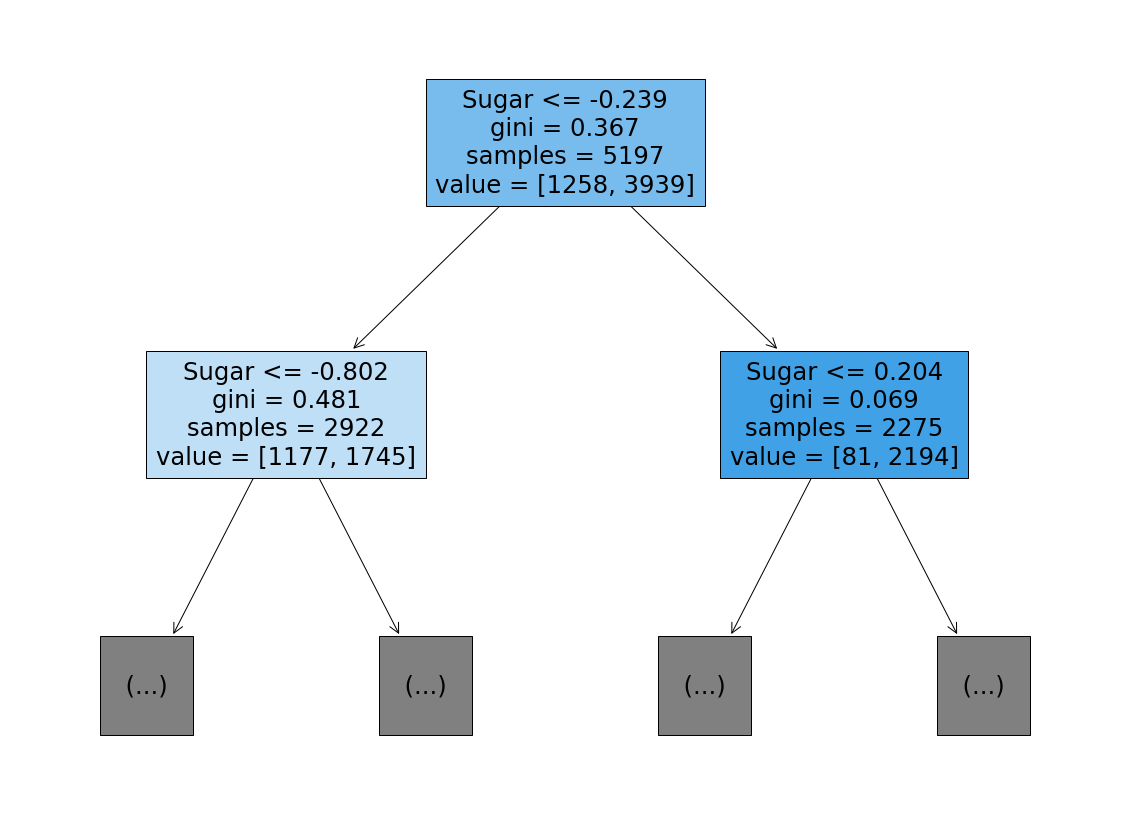

In [4]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print({'Train Score': dt.score(train_scaled,train_target)})
print({'Test Score': dt.score(test_scaled,test_target)})

plt.figure(figsize=(20,15))
plot_tree(dt, max_depth=1,filled=True, feature_names=['alcohol', 'Sugar', 'pH'])
plt.show()

{'Train Score': 0.8454877814123533}
{'Test Score': 0.8415384615384616}


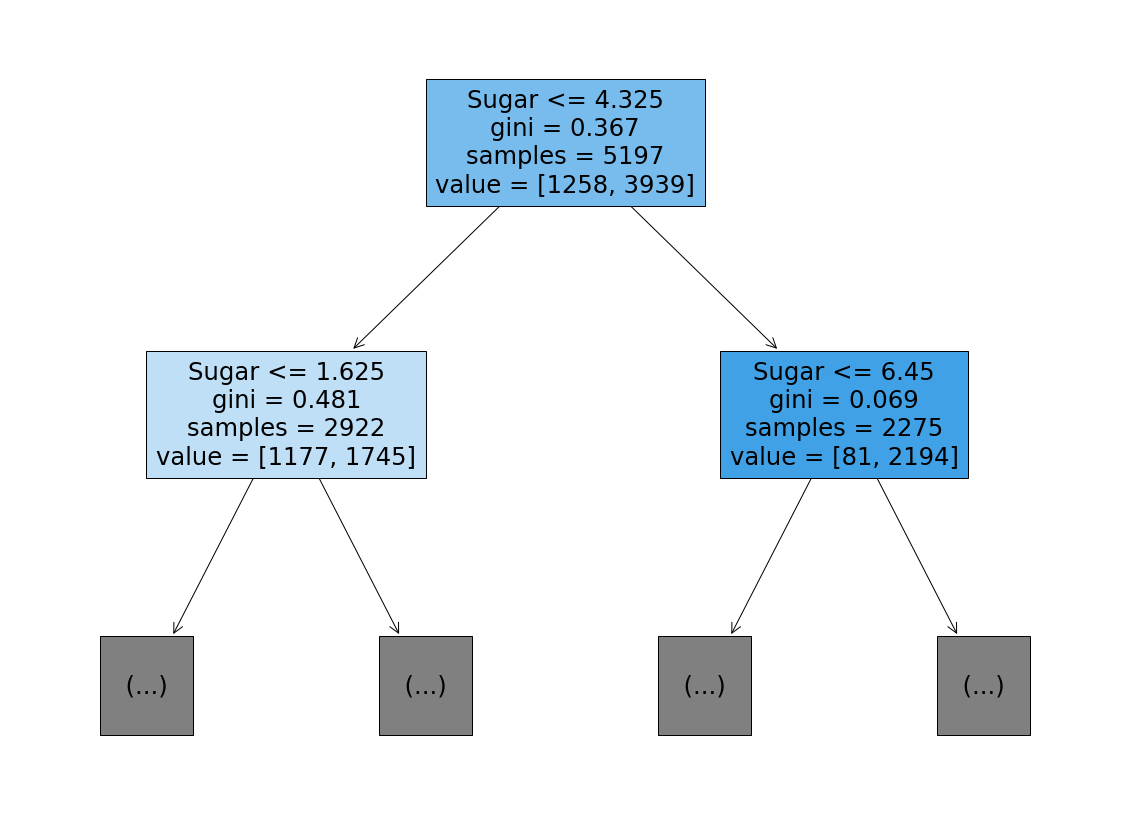

In [5]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print({'Train Score': dt.score(train_input,train_target)})
print({'Test Score': dt.score(test_input,test_target)})

plt.figure(figsize=(20,15))
plot_tree(dt, max_depth=1,filled=True, feature_names=['alcohol', 'Sugar', 'pH'])
plt.show()

In [6]:
print(dt.feature_importances_)  #특성의 중요도: 2번째가 가장 중요도 높음

[0.12345626 0.86862934 0.0079144 ]


#ch5-2. 교차검증(Cross Validation)과 그리드서치(Grid Search)

- 훈련 세트와 테스트 세트로 나누어서 훈련하다보면 결국 테스트 세트에 잘 맞는 모델이 만들어짐
- 이를 방지하고자 검증 세트를 따로 만들어 훈련세트로 훈련한 모델을 검증하고, 테스트 세트에서 최종 평가
- 검증세트를 만들면서 훈련세트가 줄어들어 모델의 성능이 떨어져 '교차검증' 방식을 사용하여 이를 보완
- 교차검증을 활용한 '그리드서치'를 통해 최적의 하이퍼파라미터를 구할 수 있음
- '랜던서치' 방식은 매개변수 값이 연속적인 수치이거나 범위 지정이 어려울때 확률 분포를 이용하여 하이퍼파라미터를 구할 수 있는 방식

step1. 훈련세트, 테스트세트, 검증세트를 만듦

In [10]:
train_input, test_input, train_target, test_target = train_test_split(data,target, test_size=0.2, random_state=42) 
sub_input, val_input, sub_target, val_target = train_test_split(train_input,train_target, test_size=0.2, random_state=42)   # 일반적으로 20~30프로

print(sub_input.shape, val_input.shape) # 훈련세트와 검증세트

(4157, 3) (1040, 3)


step2. 훈련세트로 훈련 후 검증세트로 평가

In [12]:
dt = DecisionTreeClassifier(random_state =42)
dt.fit(sub_input, sub_target)

print({'Sub Score': dt.score(sub_input,sub_target)})
print({'Val Score': dt.score(val_input,val_target)})

{'Sub Score': 0.9971133028626413}
{'Val Score': 0.864423076923077}


step3. 교차검증

In [21]:
import numpy as np
# 1번: 분류기(Splitter)가 적용되지 않은 교차검증
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)
print(np.mean(scores['test_score']))  # 교차검증 최종점수 = 각 교차검증 점수의 평균값(5-Fold 면 5개의 평균)
# 이 식에서는 훈련 세트가 섞이지 않음

from sklearn.model_selection import StratifiedKFold 

# 2번: 분류기(Splitter)가 적용되지 않은 교차검증
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

# 3번: 분류기가 적용된 교차검증
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 10-Fold 교차검증
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00859785, 0.0084424 , 0.00954485, 0.01010704, 0.00823116]), 'score_time': array([0.00138211, 0.00165749, 0.00126529, 0.00140023, 0.00127625]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
0.855300214703487
0.855300214703487
0.8574181117533719


step4-1. 그리드서치를 활용한 1개의 하이퍼파라미터 튜닝

그리드 서치는 다음과 같은 단계로 진행됨
1.   탐색 대상 모델, 매개변수 지정
2.   그리드 서치를 수행하여 최적의 매개변수를 찾음
3. 최적의 매개변수로 만든 모델을 교차검증을 하여 모델을 훈련 (gs.fit() 과정)



In [35]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}    # 결정트리의 min_impurity_decrease 매개변수의 최적값 찾기

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)   # 코어를 가장 많이 사용
gs.fit(train_input, train_target)
dt=gs.best_estimator_   # 검증점수가 가장 높은 모델
print({'GridSearch Best Score': dt.score(train_input,train_target)})   # 가장높은 검증점수
print({'GridSearch Best Param': gs.best_params_})    # 검증점수가 가장 높은 모델의 파라미터
print({'GridSearch Cross Score': gs.cv_results_['mean_test_score']})    # 각 매개변수 별 교차검증의 평균점수
best_index = np.argmax(gs.cv_results_['mean_test_score'])   # argmax()는 가장 큰 값의 index를 return
print(gs.cv_results_['params'][best_index])   # 해당하는 점수의 파라미터

{'GridSearch Score': 0.9615162593804117}
{'GridSearch Param': {'min_impurity_decrease': 0.0001}}
{'GridSearch Cross Score': array([0.86819297, 0.86453617, 0.86492226, 0.86780891, 0.86761605])}
{'min_impurity_decrease': 0.0001}


step4-2. 3개의 하이퍼파라미터 튜닝

In [52]:
params = {'min_impurity_decrease': np.arange(0.0001,0.001, 0.0001),   #9개 배열원소
          'max_depth': range(5,20,1),   #15개 정수
          'min_samples_split': range(2,100,10)    # 10개 정수
          }   # => 9 x 15 x 10 = 1350 회 교차검증

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)   # 5-Fold => 1350 x 5 = 6750 회 교차검증
gs.fit(train_input, train_target) 
dt=gs.best_estimator_
print({'GridSearch Best Score': dt.score(train_input,train_target)})
print({'GridSearch Best Param': gs.best_params_})
print({'GridSearch Max Cross Score': np.max(gs.cv_results_['mean_test_score'])})

{'GridSearch Score': 0.892053107562055}
{'GridSearch Param': {'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}}
{'GridSearch Max Cross Score': 0.8683865773302731}


step4-3. 랜덤서치를 활용한 하이퍼파라미터 튜닝

In [63]:
from scipy.stats import uniform, randint

# rgen = randint(0,10)
# rgen.rvs(10)    # 정수 10개중 10개를 겹치는거 상관없이 무작위로 샘플링(확률 분포내에서 샘플링)
# np.unique(rgen.rvs(1000), return_counts=True) #정수 10 개중 1000개를 샘프링

# ugen = uniform(0,1)
# ugen.rvs(10)    # 실수 0~1까지 10개를 샘플링

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20,50),   
          'min_samples_split': randint(2,25),    
          'min_samples_leaf': randint(1,25)
          } 

from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

print({'RandomizedSearch Best Param': gs.best_params_})
print({'RandomizedSearch Max Cross Score': np.max(gs.cv_results_['mean_test_score'])})

dt=gs.best_estimator_
print({'RandomizedSearch Best Score': dt.score(test_input,test_target)})

{'RandomizedSearch Best Param': {'max_depth': 43, 'min_impurity_decrease': 0.00011407982271508446, 'min_samples_leaf': 19, 'min_samples_split': 18}}
{'RandomizedSearch Max Cross Score': 0.8458726956392981}
{'RandomizedSearch Best Score': 0.786923076923077}


# ch5-3. 앙상블 학습(Ensemble Learning)

step1. 랜덤포레스트

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine[['class']].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data,target, test_size=0.2, random_state=42)

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print({'Train Score': np.mean(scores['train_score'])})
print({'Test Score': np.mean(scores['test_score'])})

rf.fit(train_input, train_target)
print({'Feature Importances': rf.feature_importances_})
print({'OOB Score': rf.oob_score_})


{'Train Score': 0.9973541965122431}
{'Test Score': 0.8905151032797809}


<ipython-input-67-2f6dd755d0ae>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_input, train_target)


[0.23167441 0.50039841 0.26792718]
{'OOB Score': 0.8934000384837406}


step2. 엑스트라 트리

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print({'Train Score': np.mean(scores['train_score'])})
print({'Test Score': np.mean(scores['test_score'])})

et.fit(train_input, train_target)
print({'Feature Importances': et.feature_importances_})

{'Train Score': 0.9974503966084433}
{'Test Score': 0.8887848893166506}


<ipython-input-69-efa84eb7e27a>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et.fit(train_input, train_target)


{'Feature Importances': array([0.20183568, 0.52242907, 0.27573525])}


step3. 그래디언트 부스팅

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print({'Train Score': np.mean(scores['train_score'])})
print({'Test Score': np.mean(scores['test_score'])})

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print({'Train Score': np.mean(scores['train_score'])})
print({'Test Score': np.mean(scores['test_score'])})

gb.fit(train_input, train_target)
print({'Feature Importances': gb.feature_importances_})

{'Train Score': 0.8881086892152563}
{'Test Score': 0.8720430147331015}
{'Train Score': 0.9464595437171814}
{'Test Score': 0.8780082549788999}


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Feature Importances': array([0.15872278, 0.68010884, 0.16116839])}


step4-1. 히스토그램 기반 그래디언트 부스팅

In [82]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)

print({'Train Score': np.mean(scores['train_score'])})
print({'Test Score': np.mean(scores['test_score'])})

from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input,train_target, n_repeats=10, random_state=42, n_jobs=-1)
print({'Train Set Feature Importances': result.importances_mean})

result = permutation_importance(hgb, test_input,test_target, n_repeats=10, random_state=42, n_jobs=-1)
print({'Test Set Feature Importances': result.importances_mean})
print({'Test Score': hgb.score(test_input,test_target)})

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

{'Train Score': 0.9321723946453317}
{'Test Score': 0.8801241948619236}


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Train Set Feature Importances': array([0.08876275, 0.23438522, 0.08027708])}
{'Test Set Feature Importances': array([0.05969231, 0.20238462, 0.049     ])}
{'Test Score': 0.8723076923076923}


step4-2. 히스토그램 기반 그래디언트 부스팅, XGBoost

In [83]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True)

print({'Train Score': np.mean(scores['train_score'])})
print({'Test Score': np.mean(scores['test_score'])})

{'Train Score': 0.9555033709953124}
{'Test Score': 0.8799326275264677}


step4-3. 히스토그램 기반 그래디언트 부스팅, LightGBM

In [84]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print({'Train Score': np.mean(scores['train_score'])})
print({'Test Score': np.mean(scores['test_score'])})

{'Train Score': 0.935828414851749}
{'Test Score': 0.8801251203079884}
